<a href="https://colab.research.google.com/github/dexterrxx31/DeepLearning_PyTorch/blob/master/MachineLearningProgrammingAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SIMPLE Linear  Regration Model for Predicting Price of a house using various features

###Installing and Importing Turicreate

In [89]:
!pip install turicreate

In [91]:
import turicreate

#Extracting Data From Dataset

In [92]:
sales=turicreate.SFrame('/content/drive/My Drive/2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe/home_data.sframe')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Exploring Dataset

In [93]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


#Ploting Graph between Living area and Price to get rough idea of the dataset

In [94]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'],xlabel='SqFt Living',ylabel='Price')

Materializing X axis SArray

Materializing Y axis SArray

#Splitting Dataset into Training dataset and test dataset

In [95]:
training_set, test_set = sales.random_split(.8,seed=0)

#Creating a linear regression model on Living area feature to predict price as target

In [96]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.019386     | 4349521.926170     | 262943.613754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [97]:
print (test_set['price'].mean())

543054.0425632533


#Evaluating  Your model Over testset

In [98]:
print (sqft_model.evaluate(test_set))

{'max_error': 4143550.882528601, 'rmse': 255191.0287052736}


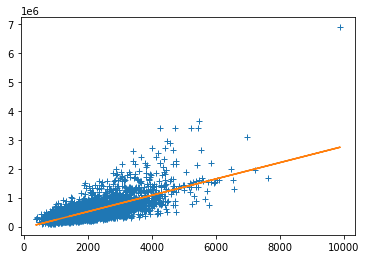

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'+',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

In [100]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47114.02067021537,4923.344377526259
sqft_living,None,281.9578501659873,2.1640546532334772


#Now try to made new model with more features

In [102]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [103]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

#98039 has maximum average sale

In [104]:
Filtered_sales_by_zipcode=sales.filter_by('98039','zipcode',exclude=False)

In [105]:
Filtered_sales_by_zipcode

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000.0,4.0,3.5,4860.0,23885.0,2.0,0
2540700110,2015-02-12 00:00:00+00:00,1905000.0,4.0,3.5,4210.0,18564.0,2.0,0
3262300940,2014-11-07 00:00:00+00:00,875000.0,3.0,1.0,1220.0,8119.0,1.0,0
3262300940,2015-02-10 00:00:00+00:00,940000.0,3.0,1.0,1220.0,8119.0,1.0,0
6447300265,2014-10-14 00:00:00+00:00,4000000.0,4.0,5.5,7080.0,16573.0,2.0,0
2470100110,2014-08-04 00:00:00+00:00,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0
2210500019,2015-03-24 00:00:00+00:00,937500.0,3.0,1.0,1320.0,8500.0,1.0,0
6447300345,2015-04-06 00:00:00+00:00,1160000.0,4.0,3.0,2680.0,15438.0,2.0,0
6447300225,2014-11-06 00:00:00+00:00,1880000.0,3.0,2.75,2620.0,17919.0,1.0,0
2525049148,2014-10-07 00:00:00+00:00,3418800.0,5.0,5.0,5450.0,20412.0,2.0,0


#Average of Zipcode 98039 is 2160606.6

In [106]:
Filtered_sales_by_zipcode['price'].mean()

2160606.6

In [107]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.037068     | 4086543.315841     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [108]:
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

#Still we want more features 

In [110]:
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [111]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4143550.882528601, 'rmse': 255191.0287052736}
{'max_error': 3152242.784869095, 'rmse': 180439.07296639626}


In [112]:
c=0
for x in sales:
  if x['sqft_living']>2000 and x['sqft_living']<=4000:
    c=c+1
    

##Fraction Of sales with house range 2000 to 4000

In [113]:
c/sales.num_rows()


0.42187572294452413

#Advanced Feature List

In [114]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [115]:
my_advance_model=turicreate.linear_regression.create(training_set,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.066623     | 4336058.938794     | 162392.982702                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [116]:
my_advance_model.coefficients.print_rows(num_rows=87,num_columns=4)

+---------------+-------+----------------------+----------------------+
|      name     | index |        value         |        stderr        |
+---------------+-------+----------------------+----------------------+
|  (intercept)  |  None |  -2263309.15960351   |  6945367.093509877   |
|    bedrooms   |  None | -30527.983105759693  |  1808.359044853826   |
|   bathrooms   |  None |   24006.1726801758   |  2969.6955828273276  |
|  sqft_living  |  None |   92.3412719684779   |  7596341.194682274   |
|    sqft_lot   |  None | 0.27794366942734905  | 0.043925750221123216 |
|     floors    |  None |  -46266.87753739907  |  3572.446242471105   |
|    zipcode    | 98125 |  151367.52760925388  |  21214.756947572096  |
|    zipcode    | 98028 |  62129.138502174246  |  24054.74866776796   |
|    zipcode    | 98136 |  203093.35775540568  |  17400.187433239684  |
|    zipcode    | 98074 |  120068.09118390264  |  19962.33004242406   |
|    zipcode    | 98053 |  136515.98863559545  |  22870.15308867

In [117]:
print(my_advance_model.evaluate(test_set))


{'max_error': 3170363.1813837998, 'rmse': 155269.65792732083}


In [118]:
print(my_features_model.evaluate(test_set))

{'max_error': 3152242.784869095, 'rmse': 180439.07296639626}


#difference Of rmse errors of features and advance feature


In [119]:
print(my_features_model.evaluate(test_set)['rmse']-my_advance_model.evaluate(test_set)['rmse'])

25169.415039075422
